In [133]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install xgboost
!pip install pandas openpyxl
!pip install mlxtend
!pip install pandas mlxtend
!pip install yellowbrick

In [134]:
!pip install --upgrade scikit-learn


In [135]:
!pip install plotly

In [136]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [137]:

# Load the Excel file
file_path = 'C:/Users/User/Document/heart.csv'
df = pd.read_csv(file_path)

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exng,oldpeak,slp,caa,thall,output
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [138]:
# Exploring the data type of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalch    303 non-null    int64  
 9   exng      303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slp       303 non-null    int64  
 12  caa       303 non-null    int64  
 13  thall     303 non-null    int64  
 14  output    303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [139]:
# Impute the missing values of trestbps column using iterative imputer
# create an object of iteratvie imputer
imputer1 = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on trestbps column
imputer1.fit(df[['trestbps']])

# Transform the data
df['trestbps'] = imputer1.transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")

Missing values in trestbps column: 0


In [140]:
# let's see which columns has missing values
(df.isnull().sum()/ len(df)* 100).sort_values(ascending=False)

id          0.0
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [141]:
# Select the features (drop the 'output' column)
X = df_train_copy.drop('output', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate the explained variance ratio
print(f"Explained variance ratio of PC1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Explained variance ratio of PC2: {pca.explained_variance_ratio_[1]:.2f}")
print(f"Cumulative explained variance ratio: {sum(pca.explained_variance_ratio_[:2]):.2f}")

Explained variance ratio of PC1: 0.21
Explained variance ratio of PC2: 0.12
Cumulative explained variance ratio: 0.33


In [142]:

# Load the Excel file
file_path = 'C:/Users/User/Document/heart.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(train.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [143]:
# find missing values.
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

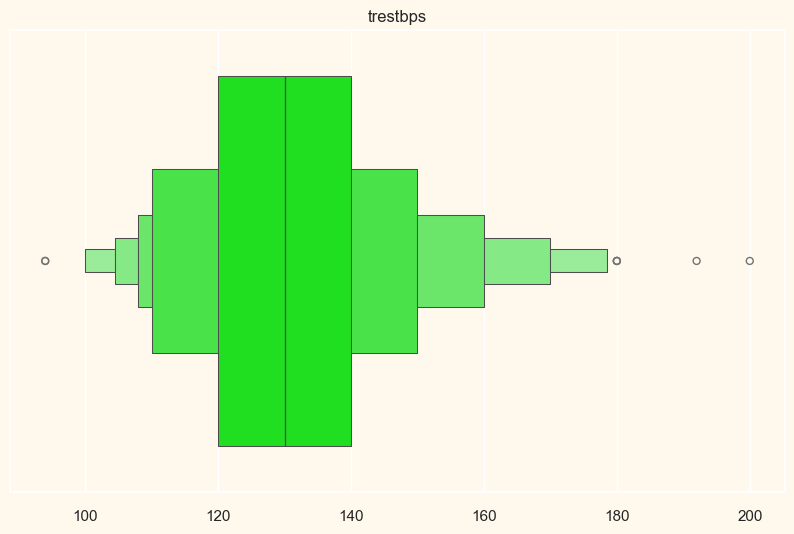

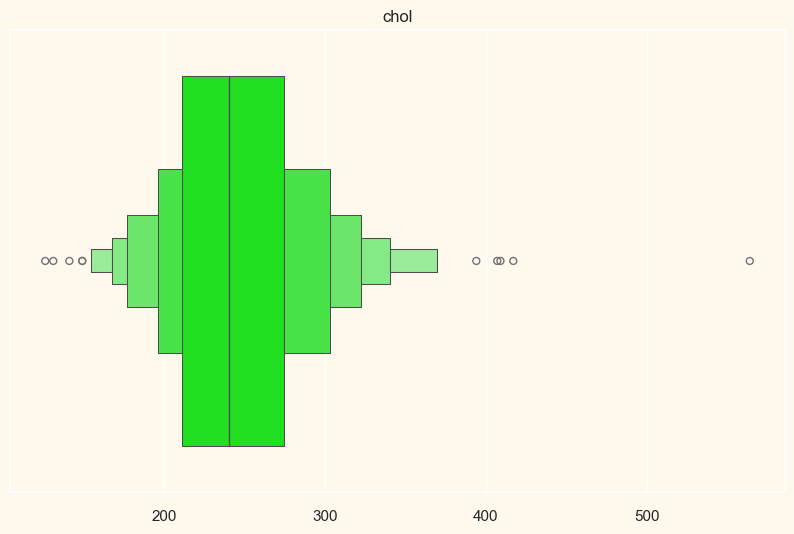

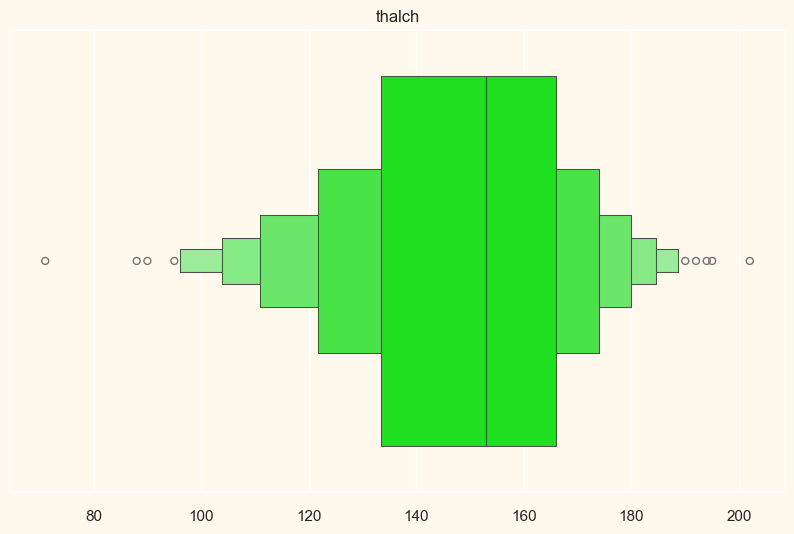

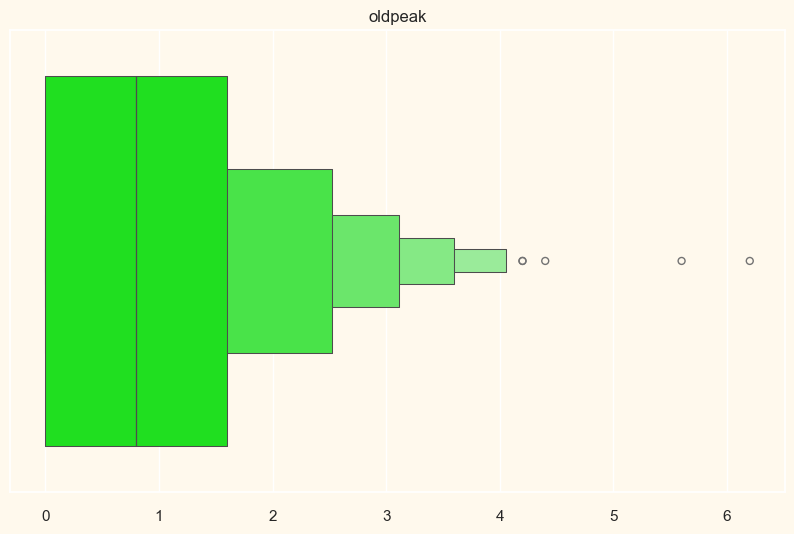

In [170]:
# Set facecolors
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Define the "night vision" color palette
night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]

# List of specific columns to plot
columns_to_plot = ['trestbps', 'chol', 'thalch', 'oldpeak']

# Plot each column individually
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.boxenplot(x=df[col], color=night_vision_palette[0])  # Use the first color from the palette
    plt.title(col)
    plt.xlabel('')
    plt.show()  # Show the plot before moving to the next one